In [1]:
#Load libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
#From dataset to train and test data
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data() 

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[1].shape

(28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

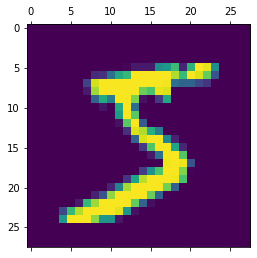

In [8]:
plt.matshow(X_train[0])

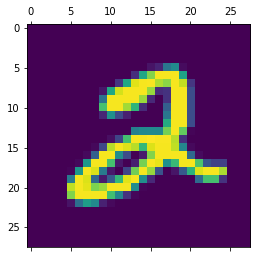

In [9]:
plt.matshow(X_train[5])

In [10]:
y_train[5]

2

In [17]:
#Scaling
X_train = X_train / 255
X_test = X_test / 255

In [18]:
#28*28 to one array
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [19]:
X_train_flattened.shape

(60000, 784)

In [20]:
X_test_flattened.shape

(10000, 784)

In [21]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [22]:
#Simple neural network with no hidden layers
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])


In [23]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 645us/step - loss: 0.4659 - accuracy: 0.8789
Epoch 2/5
1875/1875 [==============================] - 1s 692us/step - loss: 0.3027 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 1s 676us/step - loss: 0.2831 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 1s 669us/step - loss: 0.2731 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 1s 672us/step - loss: 0.2667 - accuracy: 0.9254


In [24]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 537us/step - loss: 0.2661 - accuracy: 0.9265


[0.26605385541915894, 0.9265000224113464]

In [25]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([1.8168747e-02, 4.6963007e-07, 1.0341075e-01, 9.6318954e-01,
       2.8371811e-03, 1.2823942e-01, 1.5266817e-06, 9.9979866e-01,
       1.1995697e-01, 6.4606404e-01], dtype=float32)

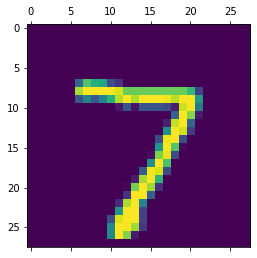

In [41]:
plt.matshow(X_test[0])

In [27]:
np.argmax(y_predicted[0])

7

In [28]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [29]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [30]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    1,    2,    0,    5,    6,    3,    1,    0],
       [   0, 1115,    4,    1,    0,    1,    4,    2,    8,    0],
       [   4,    9,  942,   17,    8,    2,   13,    9,   26,    2],
       [   1,    0,   22,  932,    0,   15,    2,   12,   21,    5],
       [   1,    1,    5,    2,  921,    0,   10,    5,   11,   26],
       [   9,    3,    5,   44,   12,  757,   15,    6,   36,    5],
       [  12,    3,    6,    1,    7,    9,  915,    2,    3,    0],
       [   1,    7,   27,    4,    8,    0,    0,  953,    2,   26],
       [   6,   11,    8,   25,    9,   21,    8,   13,  868,    5],
       [   9,    8,    2,   12,   33,    5,    0,   29,   11,  900]])>

Text(69.0, 0.5, 'Truth')

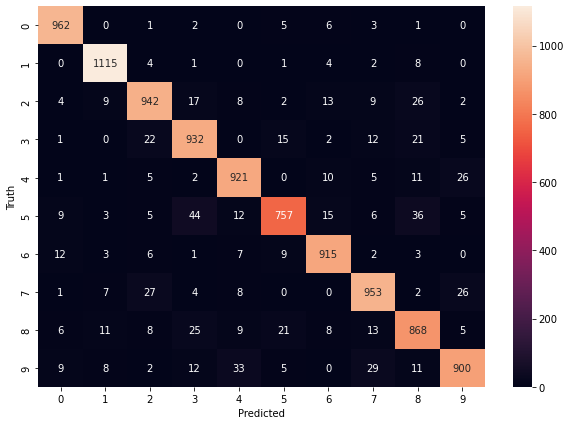

In [31]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [34]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 856us/step - loss: 0.2762 - accuracy: 0.9198
Epoch 2/5
1875/1875 [==============================] - 2s 862us/step - loss: 0.1237 - accuracy: 0.9639
Epoch 3/5
1875/1875 [==============================] - 1s 775us/step - loss: 0.0858 - accuracy: 0.9741
Epoch 4/5
1875/1875 [==============================] - 1s 795us/step - loss: 0.0651 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 2s 842us/step - loss: 0.0520 - accuracy: 0.9838


In [35]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 652us/step - loss: 0.0762 - accuracy: 0.9761


[0.07616445422172546, 0.9761000275611877]

Text(69.0, 0.5, 'Truth')

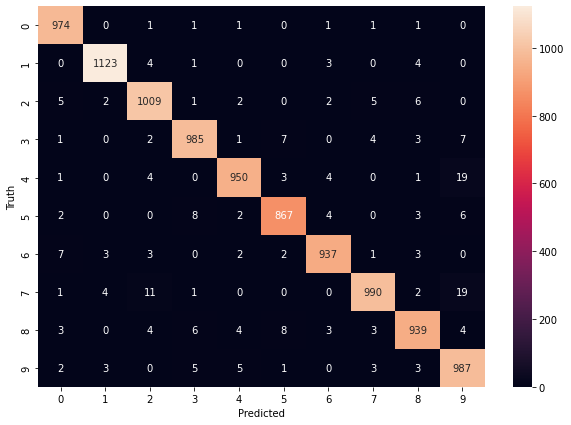

In [36]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [37]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2746 - accuracy: 0.9215
Epoch 2/10
1875/1875 [==============================] - 2s 980us/step - loss: 0.1229 - accuracy: 0.9636
Epoch 3/10
1875/1875 [==============================] - 2s 898us/step - loss: 0.0864 - accuracy: 0.9742
Epoch 4/10
1875/1875 [==============================] - 2s 823us/step - loss: 0.0648 - accuracy: 0.9804
Epoch 5/10
1875/1875 [==============================] - 2s 914us/step - loss: 0.0512 - accuracy: 0.9841
Epoch 6/10
1875/1875 [==============================] - 2s 824us/step - loss: 0.0415 - accuracy: 0.9875
Epoch 7/10
1875/1875 [==============================] - 2s 813us/step - loss: 0.0324 - accuracy: 0.9902
Epoch 8/10
1875/1875 [==============================] - 2s 838us/step - loss: 0.0281 - accuracy: 0.9908
Epoch 9/10
1875/1875 [==============================] - 2s 808us/step - loss: 0.0231 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 2s 809us/